<a href="https://colab.research.google.com/github/SuxiangLi/Fintech-545/blob/main/Fintech545_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import scipy as sp
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sympy as sy
import matplotlib.pyplot as plt
import math
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
from scipy.optimize import minimize
from scipy.special import gammaln
from statsmodels.tools import add_constant
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##Problem 1

Skewness

In [16]:
#Step 1
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 100)

In [17]:
#Step 2
print(skew(s, axis=0))

-0.2549419324361833


In [18]:
#Step 3
#np.random.seed(42)
s_skew = []
for i in range(10000):
  s = np.random.normal(mu, sigma, 100)
  sk = skew(s, axis=0)
  s_skew.append(sk)

In [19]:
len(s_skew)

10000

In [20]:
#Step 4
mean = np.average(s_skew)
std = np.std(s_skew)
mean, std

(0.0024179284961302924, 0.24142929556306378)

In [31]:
#Step 5&6
t_stat = sp.stats.ttest_1samp(s_skew, 0, axis=0)
t_stat

Ttest_1sampResult(statistic=1.0014557641168151, pvalue=0.3166307501517764)

In [30]:
#Step 7

Kurtosis

In [33]:
#Step 1
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 100)

In [34]:
#Step 2
print(kurtosis(s, axis=0))

-0.39406820904046125


In [35]:
#Step 3
#np.random.seed(42)
s_kurt = []
for i in range(10000):
  s = np.random.normal(mu, sigma, 100)
  kur = kurtosis(s, axis=0)
  s_kurt.append(kur)

In [36]:
len(s_kurt)

10000

In [37]:
#Step 4
mean = np.average(s_kurt)
std = np.std(s_kurt)
mean, std

(-0.06919091886382553, 0.44888314861227646)

In [38]:
#Step 5&6
t_stat = sp.stats.ttest_1samp(s_kurt, 0, axis=0)
t_stat

Ttest_1sampResult(statistic=-15.413244949221774, pvalue=5.412050832485064e-53)

In [54]:
#Step 7

##Problem 2

In [52]:
from google.colab import drive
drive.mount('/content/drive')
p2 = pd.read_csv('/content/drive/MyDrive/Fintech545_HW1/problem2.csv')
p2.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x,y
0,-1.614399,-1.695691
1,-0.900999,0.409843
2,-0.170662,1.043979
3,2.097252,2.708814
4,0.140208,0.052374


In [53]:
X = p2.x
Y = p2.y

In [54]:
model = sm.OLS(Y,X)

In [55]:
results = model.fit()
results.params

x    0.605191
dtype: float64

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              23.69
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                    4.28e-06
Time:                        05:06:35   Log-Likelihood:                         -160.49
No. Observations:                 100   AIC:                                      323.0
Df Residuals:                      99   BIC:                                      325.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.674
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

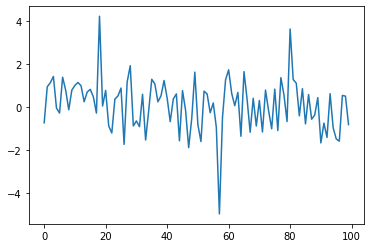

In [57]:
k = results.params[0]
error = p2.y - p2.x*k
#error = sy.Matrix(np.array(error))
plt.plot(error)
plt.show()

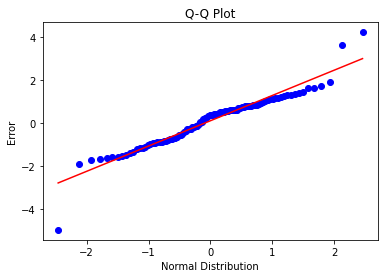

In [58]:
sp.stats.probplot(error, dist="norm", plot=plt)
plt.ylabel('Error')
plt.xlabel('Normal Distribution')
plt.title('Q-Q Plot')
plt.show()

In [59]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
  # extract parameters
  const, beta, std_dev = parameters
  # predict the output
  pred = const + beta*X
  # Calculate the log-likelihood for normal distribution
  LL = np.sum(sp.stats.norm.logpdf(Y, pred, std_dev))
  # Calculate the negative log-likelihood
  neg_LL = -1*LL
  return neg_LL

In [60]:
mle_model = minimize(MLE_Norm, [0,1,1])
mle_model

      fun: 159.99209668916234
 hess_inv: array([[ 1.49972307e-02, -2.44684549e-05, -9.95106501e-06],
       [-2.44684549e-05,  1.55255340e-02, -2.01402868e-04],
       [-9.95106501e-06, -2.01402868e-04,  7.23780926e-03]])
      jac: array([ 1.90734863e-06, -1.90734863e-06,  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 10
     njev: 15
   status: 0
  success: True
        x: array([0.1198362 , 0.60520479, 1.19839412])

In [61]:
AIC = 6 + 2*mle_model.fun
AIC

325.9841933783247

In [64]:
def T_loglikelihood(params, x, y):
    mu, s, nu = params
    n = x.shape[0]
    np12 = (nu + 1.0)/2.0
    mess = gammaln(np12) - gammaln(nu/2.0) - math.log(math.sqrt(math.pi*nu)*s)
    xm = ((x - mu)/s)**2 * (1/nu) + 1
    innerSum = np.log(xm).sum()
    # Calculate negative log-likelihood
    ll = n*mess - np12*innerSum
    return -ll  

In [68]:
mle_model = minimize(T_loglikelihood, [0, 1, 1], args=(X, Y))
mle_model

      fun: 139.22003054654311
 hess_inv: array([[ 1.22049896e-02, -1.15467384e-03, -2.34425134e+00],
       [-1.15467384e-03,  8.61872977e-03,  9.66515655e+00],
       [-2.34425134e+00,  9.66515655e+00,  7.00509343e+04]])
      jac: array([-3.84330750e-03, -1.71279907e-02, -1.90734863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 191
      nit: 23
     njev: 45
   status: 2
  success: False
        x: array([2.06946933e-03, 9.64910172e-01, 1.09908363e+02])

In [66]:
AIC = 6 + mle_model.fun * 2
AIC

284.44006109308623

##Problem 3

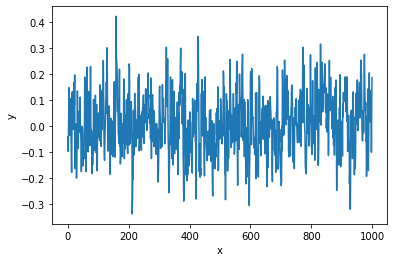

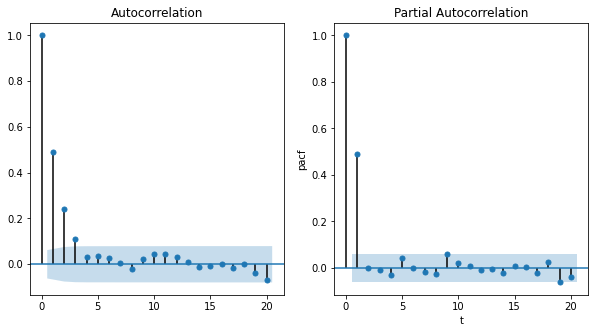

In [69]:
np.random.seed(42)

def plot_acfa(y):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    plot_acf(y, ax=ax[0], lags=20)
    plt.xlabel('t')
    plt.ylabel('acf')
    plot_pacf(y, ax=ax[1], lags=20, method='ywm')
    plt.xlabel('t')
    plt.ylabel('pacf')
    plt.show()

# AR(1)
ar_coefs = [1, -0.5]
y = arma_generate_sample(ar_coefs, [1], scale=0.1, nsample=1000, burnin=50)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plot_acfa(y)

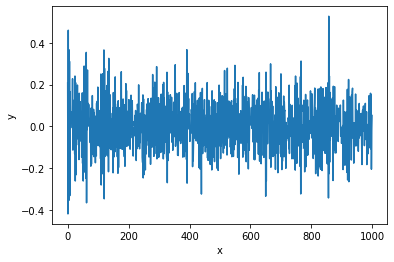

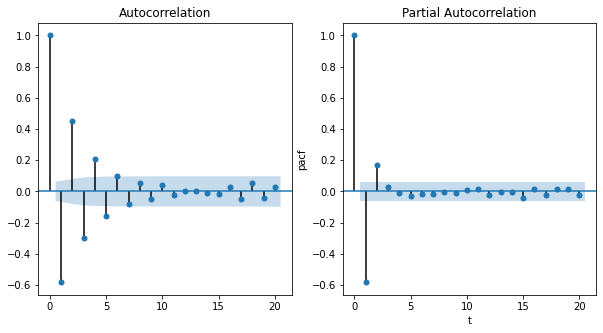

In [70]:
# AR(2)
ar_coefs = [1, 0.5, -0.2]
y = arma_generate_sample(ar_coefs, [1], scale=0.1, nsample=1000, burnin=50)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plot_acfa(y)

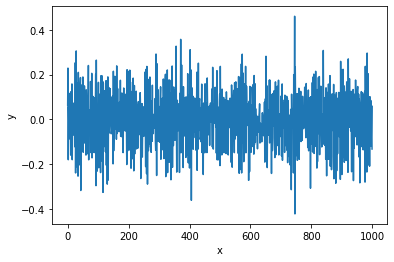

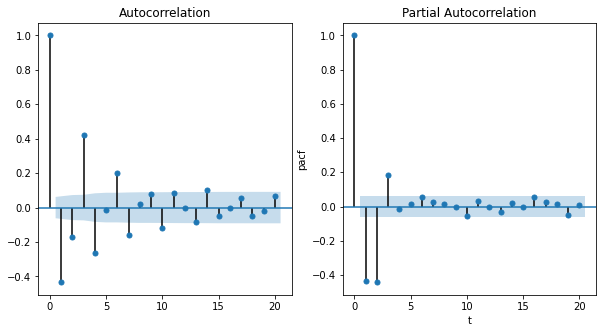

In [71]:
# AR(3)
ar_coefs = [1, 0.5, 0.3, -0.2]
y = arma_generate_sample(ar_coefs, [1], scale=0.1, nsample=1000, burnin=50)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plot_acfa(y)

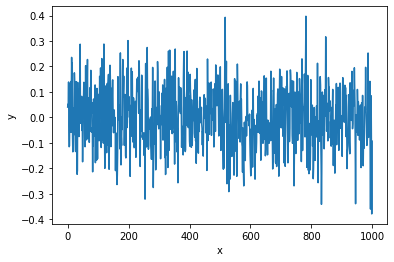

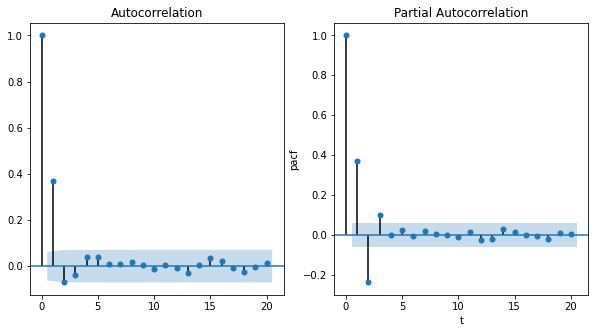

In [72]:
# MA(1)
ma_coefs = [1, 0.5]
y = arma_generate_sample([1], ma_coefs, scale=0.1, nsample=1000, burnin=50)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plot_acfa(y)

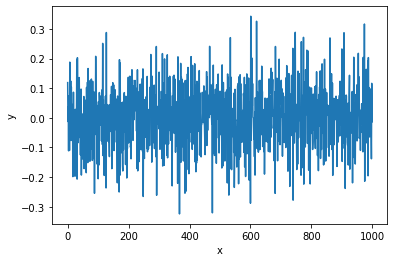

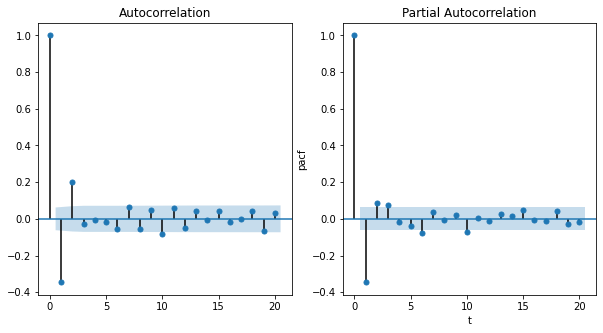

In [73]:
# MA(2)
ma_coefs = [1, -0.3, 0.2]
y = arma_generate_sample([1], ma_coefs, scale=0.1, nsample=1000, burnin=50)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plot_acfa(y)

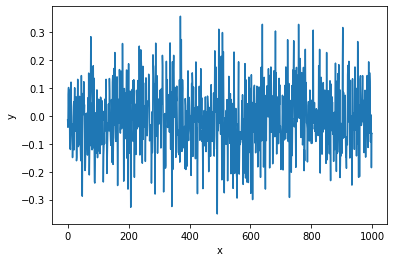

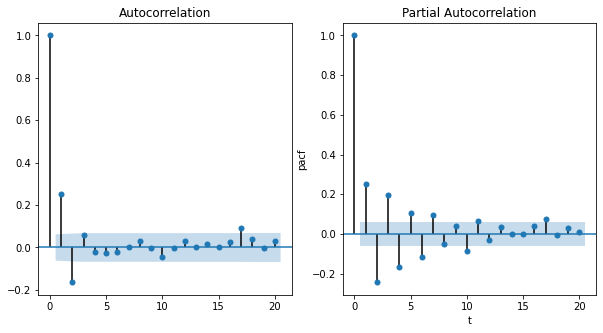

In [74]:
# MA(3)
ma_coefs = [1, 0.5, -0.2, 0.1]
y = arma_generate_sample([1], ma_coefs,  scale=0.1, nsample=1000, burnin=50)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
plot_acfa(y)